In [25]:
import os,pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import cv2 
from sklearn.model_selection import train_test_split
from PIL import Image 
import matplotlib.image as mpimg
import tensorflow as tf
from tensorflow import keras  

In [5]:
withmask=os.listdir('data\with_mask')
withoutmask=os.listdir('data\without_mask')

In [6]:
withmask

['with_mask_1.jpg',
 'with_mask_10.jpg',
 'with_mask_100.jpg',
 'with_mask_1000.jpg',
 'with_mask_1001.jpg',
 'with_mask_1002.jpg',
 'with_mask_1003.jpg',
 'with_mask_1004.jpg',
 'with_mask_1005.jpg',
 'with_mask_1006.jpg',
 'with_mask_1007.jpg',
 'with_mask_1008.jpg',
 'with_mask_1009.jpg',
 'with_mask_101.jpg',
 'with_mask_1010.jpg',
 'with_mask_1011.jpg',
 'with_mask_1012.jpg',
 'with_mask_1013.jpg',
 'with_mask_1014.jpg',
 'with_mask_1015.jpg',
 'with_mask_1016.jpg',
 'with_mask_1017.jpg',
 'with_mask_1018.jpg',
 'with_mask_1019.jpg',
 'with_mask_102.jpg',
 'with_mask_1020.jpg',
 'with_mask_1021.jpg',
 'with_mask_1022.jpg',
 'with_mask_1023.jpg',
 'with_mask_1024.jpg',
 'with_mask_1025.jpg',
 'with_mask_1026.jpg',
 'with_mask_1027.jpg',
 'with_mask_1028.jpg',
 'with_mask_1029.jpg',
 'with_mask_103.jpg',
 'with_mask_1030.jpg',
 'with_mask_1031.jpg',
 'with_mask_1032.jpg',
 'with_mask_1033.jpg',
 'with_mask_1034.jpg',
 'with_mask_1035.jpg',
 'with_mask_1036.jpg',
 'with_mask_1037.jpg

In [7]:
len(withmask)

3725

In [8]:
len(withoutmask)

3828

In [9]:
withmasklabel=[1]*3725
withoutmasklabel=[0]*3828

In [10]:
withmasklabel

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [11]:
label=withmasklabel+withoutmasklabel

In [12]:
len(label)

7553

In [13]:
img=mpimg.imread("data\with_mask\with_mask_6.jpg")

In [14]:
img

array([[[ 9,  7, 10],
        [10,  8, 11],
        [ 7,  5,  8],
        ...,
        [ 2,  4,  3],
        [ 2,  4,  3],
        [ 2,  4,  3]],

       [[ 9,  7, 10],
        [ 9,  7, 10],
        [ 9,  7, 10],
        ...,
        [ 2,  4,  3],
        [ 2,  4,  3],
        [ 2,  4,  3]],

       [[ 7,  7,  9],
        [10, 10, 12],
        [ 9,  9, 11],
        ...,
        [ 2,  4,  3],
        [ 2,  4,  3],
        [ 2,  4,  3]],

       ...,

       [[ 2,  6,  7],
        [ 2,  6,  7],
        [ 2,  6,  7],
        ...,
        [ 3,  2,  7],
        [ 3,  2,  8],
        [ 3,  2,  8]],

       [[ 2,  6,  7],
        [ 2,  6,  7],
        [ 2,  6,  9],
        ...,
        [ 3,  4,  9],
        [ 3,  3, 11],
        [ 3,  3, 11]],

       [[ 2,  6,  7],
        [ 2,  6,  7],
        [ 2,  6,  9],
        ...,
        [ 3,  3, 11],
        [ 3,  3, 11],
        [ 3,  3, 13]]], dtype=uint8)

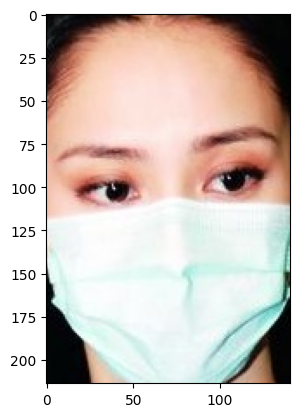

In [15]:
plt.imshow(img)

In [16]:
img

array([[[ 9,  7, 10],
        [10,  8, 11],
        [ 7,  5,  8],
        ...,
        [ 2,  4,  3],
        [ 2,  4,  3],
        [ 2,  4,  3]],

       [[ 9,  7, 10],
        [ 9,  7, 10],
        [ 9,  7, 10],
        ...,
        [ 2,  4,  3],
        [ 2,  4,  3],
        [ 2,  4,  3]],

       [[ 7,  7,  9],
        [10, 10, 12],
        [ 9,  9, 11],
        ...,
        [ 2,  4,  3],
        [ 2,  4,  3],
        [ 2,  4,  3]],

       ...,

       [[ 2,  6,  7],
        [ 2,  6,  7],
        [ 2,  6,  7],
        ...,
        [ 3,  2,  7],
        [ 3,  2,  8],
        [ 3,  2,  8]],

       [[ 2,  6,  7],
        [ 2,  6,  7],
        [ 2,  6,  9],
        ...,
        [ 3,  4,  9],
        [ 3,  3, 11],
        [ 3,  3, 11]],

       [[ 2,  6,  7],
        [ 2,  6,  7],
        [ 2,  6,  9],
        ...,
        [ 3,  3, 11],
        [ 3,  3, 11],
        [ 3,  3, 13]]], dtype=uint8)

In [17]:
fileMask = 'G:/Mon Drive/Deep_learning Python/TestMask/data/with_mask/'
fileWithoutMask = 'G:/Mon Drive/Deep_learning Python/TestMask/data/without_mask/'
data = []
for img in withmask:
    image = Image.open(fileMask + img)
    image = image.resize( (128 ,128) )
    image = image.convert('RGB')
    image = np.array(image)
    data.append(image)

for img in withoutmask:
    image = Image.open(fileWithoutMask + img)
    image = image.resize( (128 ,128) )
    image = image.convert('RGB')
    image = np.array(image)
    data.append(image)


c:\Users\HP\AppData\Local\Programs\Python\Python39\lib\site-packages\PIL\Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [18]:
data

[array([[[50, 58, 31],
         [46, 55, 33],
         [56, 58, 42],
         ...,
         [27, 32, 25],
         [29, 33, 19],
         [33, 40, 17]],
 
        [[47, 54, 30],
         [49, 58, 36],
         [59, 63, 40],
         ...,
         [18, 21, 11],
         [37, 42, 31],
         [31, 41, 23]],
 
        [[51, 58, 37],
         [50, 59, 37],
         [59, 64, 37],
         ...,
         [45, 44, 30],
         [29, 34, 27],
         [20, 30, 18]],
 
        ...,
 
        [[63, 73, 37],
         [66, 75, 41],
         [74, 84, 50],
         ...,
         [ 5,  3,  0],
         [20, 19, 14],
         [17, 16, 12]],
 
        [[58, 72, 34],
         [60, 70, 39],
         [68, 75, 49],
         ...,
         [16, 15, 12],
         [15, 13, 10],
         [13,  9,  7]],
 
        [[53, 69, 30],
         [53, 64, 37],
         [57, 64, 42],
         ...,
         [18, 18, 16],
         [16, 13, 12],
         [19, 12, 13]]], dtype=uint8),
 array([[[117,  61,  15],
         [121,  

In [19]:
data[0][0][0][0]

50

In [20]:
data[0].shape

(128, 128, 3)

In [21]:
y=np.array(label)

In [22]:
x=np.array(data)

In [23]:
xtrain, ytrain, xtest ,ytest = train_test_split(x,y,test_size=0.2,random_state=True)

In [24]:
xtrain2=xtrain/255
ytrain2= ytrain /255

In [26]:
#Initialise le model (model couche par couche)
model = keras.Sequential() 

#1er cocuhe de convolution avec:
    #32: 32 noyuax ou nombre de filtres
    #(3,3) : taille de chaque filre (carré 3*3) 
    #La fonction d'activation : ajouter la nom linéarité au model
    #Input shape: definit la forme des donées d'entre (image 128*128 avec format (RGB))
model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))

#1er couche de poling 
    #Pol size (2,2): taille de fenetre de poling qui reduit chaque dim de la carte par un facteur de 2
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

#2eme couche de convolution:
    #64: 64 noyuax ou nombre de filtres
    #(3,3) : taille de chaque filre (carré 3*3) 
    #La fonction d'activation : ajouter la nom linéarité au model
model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))

#2eme couche de poling 
    #Pol size (2,2): taille de fenetre de poling qui reduit chaque dim de la carte par un facteur de 2
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))



#Applatissement des donées:
    #Converir les caractéristique 2D en un vecteur 1D
model.add(keras.layers.Flatten())

#1er Couche dense:
    #Ajout une couche dense avec 128 unité
    #Utilisation de la fonction d'activation Relu
model.add(keras.layers.Dense(128, activation='relu'))

#1er couche de dropout:
    #Couche qui abondnne 50% des caractéristique (diversité de caratérisiques)
model.add(keras.layers.Dropout(0.5))

#2eme couche dense:
    #Couche avec 64 unités
model.add(keras.layers.Dense(64, activation='relu'))

#2eme couche dropout:
model.add(keras.layers.Dropout(0.5))

#Couche de sortie:
    #Identifier le nombre de class a predire + la fnct d'activation
model.add(keras.layers.Dense(2, activation='sigmoid'))


In [27]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [28]:
MODELFITTING = model.fit(xtrain2, ytrain2, validation_split=0.1, epochs=5)

ValueError: Data cardinality is ambiguous:
  x sizes: 5437
  y sizes: 1511
Make sure all arrays contain the same number of samples.